# Automatic picking and event location

In [1]:
%matplotlib inline

from microquake.core import Stream, event, station, ctl, read
from microquake.core.stream import composite_traces, is_valid
from microquake.waveform import pick
from microquake.imaging.plot import Plot
from microquake.waveform import mag
import microquake.nlloc as nll
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

reading control file

In [2]:
params = ctl.parse_control_file('input.xml')

Creating files and directory structure required by NLLOC

In [10]:
nll_opts = nll.init_nlloc_from_params(params)
# nll_opts.prepare(create_time_grids=True, tar_files=False)

Reading seismogram

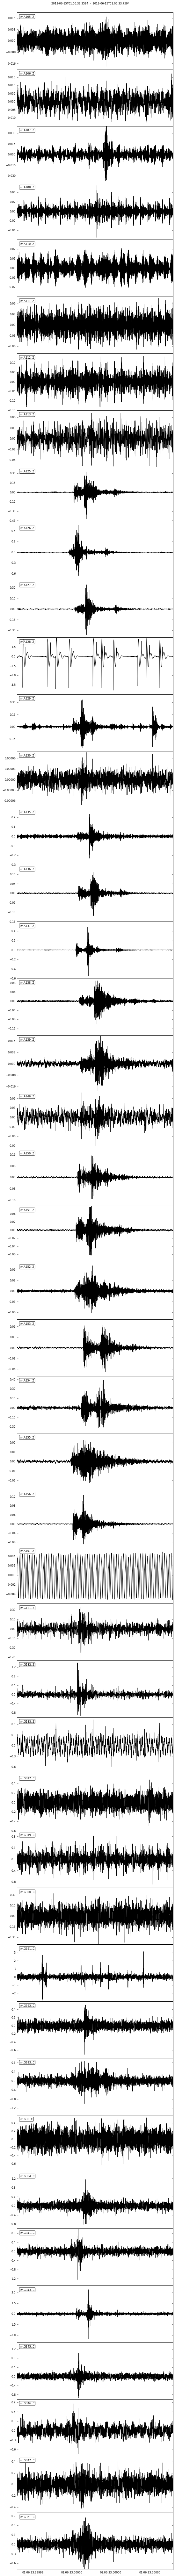

In [4]:
st = read('data_example.mseed')
composite_traces(st.copy()).plot(equal_scale=False)

Filtering bad traces

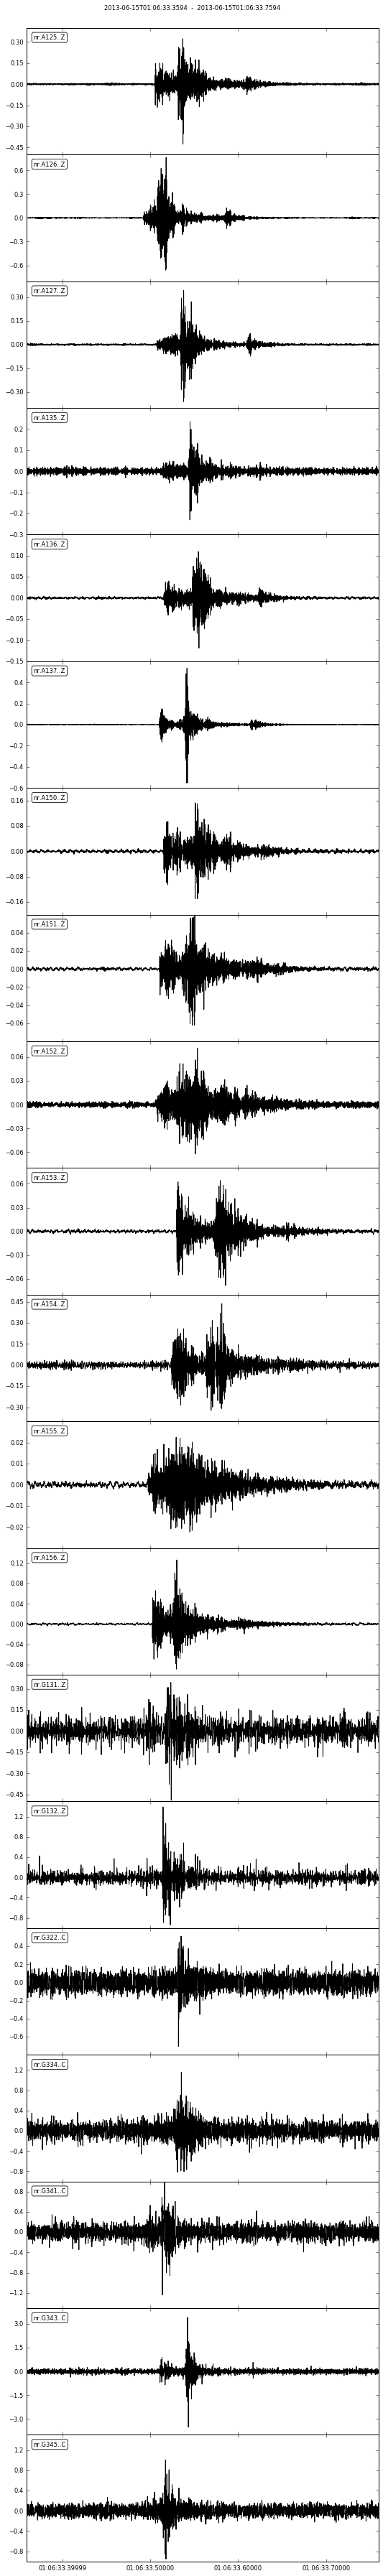

In [5]:
st_valid = is_valid(st, return_stream=True)
composite_traces(st_valid.copy()).plot(equal_scale=False)

In [6]:
site = params.sensors.site
st2 = st_valid.copy()
evt_pick = pick.automatic_picking(st2, site, params)
evt_mg = mag.moment_magnitude(st2, evt_pick, site, params.velgrids.vp, params.velgrids.vs)

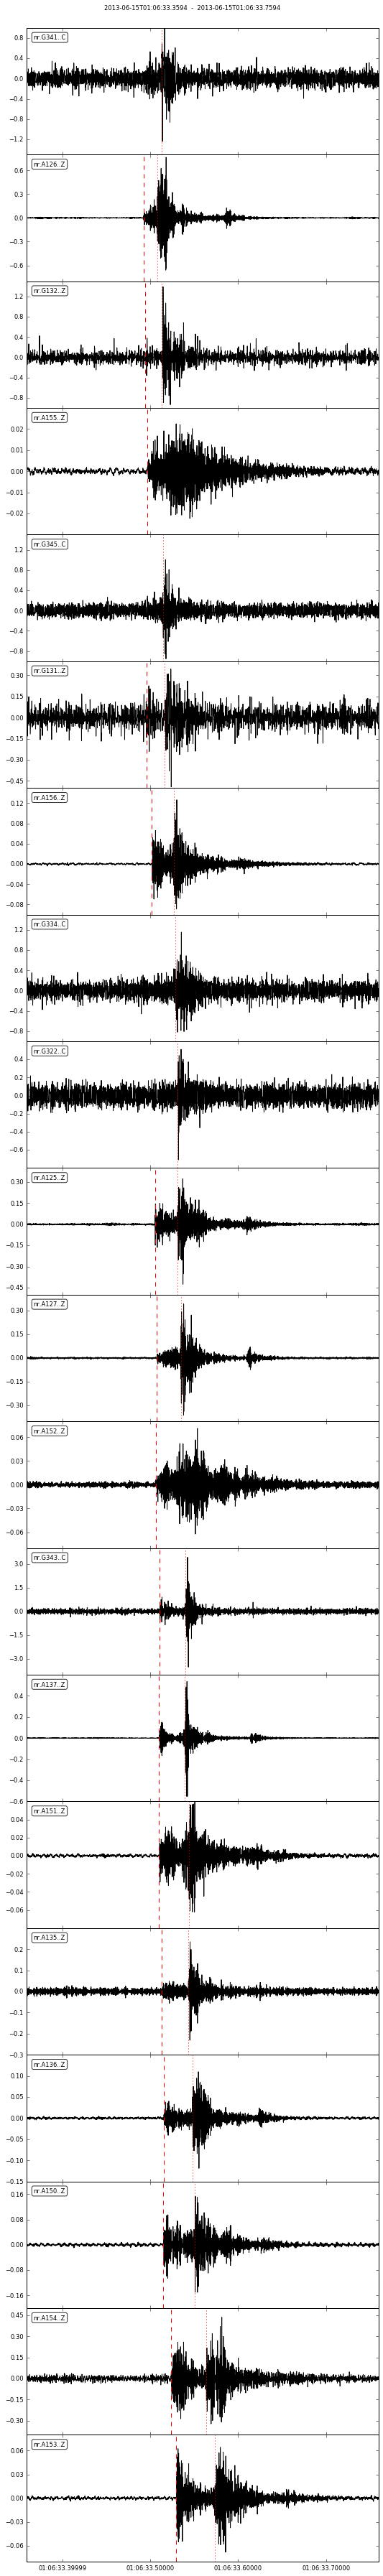

In [7]:
composite_traces(st_valid.copy()).plot(equal_scale=False, event=evt_mg, site=site)

In [8]:
print evt_mg

Event:	2013-06-15T01:06:33.473300Z | 10233, 10284, 2867 | 1.21973808782 Mw | automatic


	   resource_id: ResourceIdentifier(id="smi:local/03dbf26b-4378-47bd-aa7b-571ce59b288b")
	 creation_info: CreationInfo(author='microquake', version='0.1')
	---------
	         picks: 34 Elements
	       origins: 1 Elements
	    magnitudes: 1 Elements


In [9]:
cat = event.Catalog(events=[evt_mg])
cat.write('data_example.xml', format='quakeml')